In [1]:
from fastai.vision.all import *

In [9]:
path = Path('C:/Users/davor/.fastai/data/caltech_101')

In [10]:
path

Path('C:/Users/davor/.fastai/data/caltech_101')

In [11]:
def parent_label_fn(file_path: Path):
    return file_path.parent.name

In [12]:
files = get_image_files(path)

In [13]:
files

(#9144) [Path('C:/Users/davor/.fastai/data/caltech_101/accordion/image_0001.jpg'),Path('C:/Users/davor/.fastai/data/caltech_101/accordion/image_0002.jpg'),Path('C:/Users/davor/.fastai/data/caltech_101/accordion/image_0003.jpg'),Path('C:/Users/davor/.fastai/data/caltech_101/accordion/image_0004.jpg'),Path('C:/Users/davor/.fastai/data/caltech_101/accordion/image_0005.jpg'),Path('C:/Users/davor/.fastai/data/caltech_101/accordion/image_0006.jpg'),Path('C:/Users/davor/.fastai/data/caltech_101/accordion/image_0007.jpg'),Path('C:/Users/davor/.fastai/data/caltech_101/accordion/image_0008.jpg'),Path('C:/Users/davor/.fastai/data/caltech_101/accordion/image_0009.jpg'),Path('C:/Users/davor/.fastai/data/caltech_101/accordion/image_0010.jpg'),Path('C:/Users/davor/.fastai/data/caltech_101/accordion/image_0011.jpg'),Path('C:/Users/davor/.fastai/data/caltech_101/accordion/image_0012.jpg'),Path('C:/Users/davor/.fastai/data/caltech_101/accordion/image_0013.jpg'),Path('C:/Users/davor/.fastai/data/caltech_

In [14]:
failed = verify_images(get_image_files(path))
#failed.map(Path.unlink)
len(failed)

0

In [15]:
# Confirm the objects are Path instances (not strings)
assert isinstance(files[0], Path)

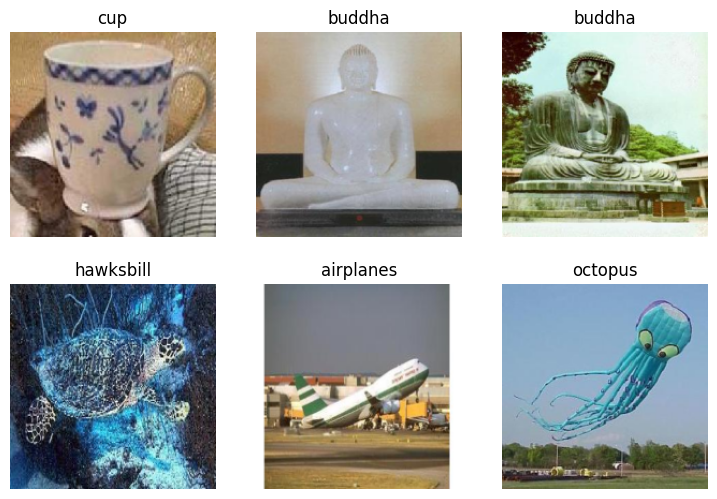

In [16]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [17]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

In [18]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,2.017926,0.551626,0.137309,03:45


epoch,train_loss,valid_loss,error_rate,time
0,0.551843,0.284654,0.074945,04:52


In [19]:
object, _, probs = learn.predict(PILImage.create("object.jpg") )
print(f'Predicted: {object}; Probability: {probs.max():.4f}')

Predicted: helicopter; Probability: 0.9958


In [20]:
learn.export('object_model.pkl')